
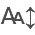

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

import pandas as pd
import numpy as np

from scipy.stats import pearsonr 
from joblib import Parallel, delayed

# import urllib.request
import fastobo

import json

import goatools
from goatools.obo_parser import GODag

import itables.options as opt
from itables import init_notebook_mode, show
from itables.downsample import as_nbytes, nbytes
from itables.sample_dfs import get_indicators

init_notebook_mode(all_interactive=False)
opt.maxBytes = "128KB"

import seaborn as sns

sns.set()
plt.style.use('default')
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, BoundaryNorm

import matplotlib.cm as cm
import matplotlib.colors as mcolors

from collections import Counter



In [2]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['axes.titlesize'] = 20

## Trabajo con la matriz de correlación 

In [2]:
matriz_pear = pd.read_csv('../../Datos/transcriptomas/Matrices_javi/matriz_pearson_breeden.csv')
matriz_pear = matriz_pear.set_index('Proteina')
matriz_pear.head()

YAL001C   YAL002W   YAL003W   YAL004W   YAL005C   YAL007C  \
Proteina                                                               
YAL001C   1.000000  0.784409 -0.255929 -0.000721  0.124635 -0.135642   
YAL002W   0.784409  1.000000 -0.123425  0.319548  0.328560 -0.291349   
YAL003W  -0.255929 -0.123425  1.000000  0.547065  0.622235  0.410656   
YAL004W  -0.000721  0.319548  0.547065  1.000000  0.421385  0.195020   
YAL005C   0.124635  0.328560  0.622235  0.421385  1.000000  0.490343   

           YAL008W   YAL009W   YAL010C   YAL011W  ...   YPR194C   YPR195C  \
Proteina                                          ...                       
YAL001C   0.068274 -0.208016 -0.299033  0.302697  ...  0.110906  0.192338   
YAL002W  -0.001941 -0.428036 -0.446571  0.461013  ... -0.267790  0.156363   
YAL003W   0.247240 -0.175059 -0.003965  0.073686  ... -0.376035  0.005696   
YAL004W   0.078229 -0.540098 -0.166937  0.130986  ... -0.343021  0.282223   
YAL005C   0.529234 -0.297900 -0.515094  0.285265  ... -0.578441 -0.027009   

           YPR196W   YPR197C   YPR198W   YPR199C   YPR200C   YPR201W  \
Proteina                                                               
YAL001C   0.053657 -0.280936  0.393633 -0.057262 -0.237002  0.371669   
YAL002W   0.049744 -0.305974  0.368092 -0.187421 -0.604758  0.149767   
YAL003W  -0.300600  0.077396 -0.619781 -0.266689  0.030231 -0.170058   
YAL004W  -0.040569  0.437393 -0.452444 -0.556235 -0.384033  0.010244   
YAL005C   0.012542 -0.418005 -0.374103 -0.192349 -0.362241 -0.150002   

           YPR202W   YPR203W  
Proteina                      
YAL001C   0.053529  0.024929  
YAL002W   0.125068  0.234124  
YAL003W  -0.161563 -0.110182  
YAL004W   0.374832  0.544893  
YAL005C  -0.149757  0.049754  

[5 rows x 6217 columns]

In [3]:
enlaces = matriz_pear.copy().to_numpy()

enlaces[np.tril_indices_from(enlaces, k=-1)] = 0
df = pd.DataFrame(enlaces, columns=matriz_pear.columns, index=matriz_pear.index)
df.head()

YAL001C   YAL002W   YAL003W   YAL004W   YAL005C   YAL007C   YAL008W  \
Proteina                                                                        
YAL001C       1.0  0.784409 -0.255929 -0.000721  0.124635 -0.135642  0.068274   
YAL002W       0.0  1.000000 -0.123425  0.319548  0.328560 -0.291349 -0.001941   
YAL003W       0.0  0.000000  1.000000  0.547065  0.622235  0.410656  0.247240   
YAL004W       0.0  0.000000  0.000000  1.000000  0.421385  0.195020  0.078229   
YAL005C       0.0  0.000000  0.000000  0.000000  1.000000  0.490343  0.529234   

           YAL009W   YAL010C   YAL011W  ...   YPR194C   YPR195C   YPR196W  \
Proteina                                ...                                 
YAL001C  -0.208016 -0.299033  0.302697  ...  0.110906  0.192338  0.053657   
YAL002W  -0.428036 -0.446571  0.461013  ... -0.267790  0.156363  0.049744   
YAL003W  -0.175059 -0.003965  0.073686  ... -0.376035  0.005696 -0.300600   
YAL004W  -0.540098 -0.166937  0.130986  ... -0.343021  0.282223 -0.040569   
YAL005C  -0.297900 -0.515094  0.285265  ... -0.578441 -0.027009  0.012542   

           YPR197C   YPR198W   YPR199C   YPR200C   YPR201W   YPR202W   YPR203W  
Proteina                                                                        
YAL001C  -0.280936  0.393633 -0.057262 -0.237002  0.371669  0.053529  0.024929  
YAL002W  -0.305974  0.368092 -0.187421 -0.604758  0.149767  0.125068  0.234124  
YAL003W   0.077396 -0.619781 -0.266689  0.030231 -0.170058 -0.161563 -0.110182  
YAL004W   0.437393 -0.452444 -0.556235 -0.384033  0.010244  0.374832  0.544893  
YAL005C  -0.418005 -0.374103 -0.192349 -0.362241 -0.150002 -0.149757  0.049754  

[5 rows x 6217 columns]

In [ ]:
# df.to_csv('../../Datos/transcriptomas/Matrices_javi/matriz_pearson_breeden_superior.csv', header=True, index=True) #47seg en guardar la matriz triangular superior

In [66]:
adyacencia = matriz_pear.copy()

#originalmente cota en 0.5
cota = 0.9
# cota = 0.6
adyacencia[(matriz_pear >= -cota) & (matriz_pear <= cota)] = 0
adyacencia[(matriz_pear > cota) & (matriz_pear < 0.999999)] = 2
adyacencia[(matriz_pear < -cota)] = -2

adyacencia.head()

YAL001C  YAL002W  YAL003W  YAL004W  YAL005C  YAL007C  YAL008W  \
Proteina                                                                  
YAL001C       1.0      0.0      0.0      0.0      0.0      0.0      0.0   
YAL002W       0.0      1.0      0.0      0.0      0.0      0.0      0.0   
YAL003W       0.0      0.0      1.0      0.0      0.0      0.0      0.0   
YAL004W       0.0      0.0      0.0      1.0      0.0      0.0      0.0   
YAL005C       0.0      0.0      0.0      0.0      1.0      0.0      0.0   

          YAL009W  YAL010C  YAL011W  ...  YPR194C  YPR195C  YPR196W  YPR197C  \
Proteina                             ...                                       
YAL001C       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YAL002W       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YAL003W       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YAL004W       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YAL005C       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   

          YPR198W  YPR199C  YPR200C  YPR201W  YPR202W  YPR203W  
Proteina                                                        
YAL001C       0.0      0.0      0.0      0.0      0.0      0.0  
YAL002W       0.0      0.0      0.0      0.0      0.0      0.0  
YAL003W       0.0      0.0      0.0      0.0      0.0      0.0  
YAL004W       0.0      0.0      0.0      0.0      0.0      0.0  
YAL005C       0.0      0.0      0.0      0.0      0.0      0.0  

[5 rows x 6217 columns]

In [5]:
adyacencia.to_csv('../../Datos/transcriptomas/Matrices_javi/matriz_pearson_breeden_adyacencia-'+str(cota)+'.csv', header=True, index=True)

### Trato de armar enlaces

In [67]:
adyacencia = pd.read_csv('../../Datos/transcriptomas/Matrices_javi/matriz_pearson_breeden_adyacencia-'+str(cota)+'.csv')
adyacencia = adyacencia.set_index('Proteina')

In [68]:
adyacencia_sin_diagonal = adyacencia.copy()
np.fill_diagonal(adyacencia_sin_diagonal.values, 0)
adyacencia_sin_diagonal.head()

YAL001C  YAL002W  YAL003W  YAL004W  YAL005C  YAL007C  YAL008W  \
Proteina                                                                  
YAL001C       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YAL002W       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YAL003W       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YAL004W       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YAL005C       0.0      0.0      0.0      0.0      0.0      0.0      0.0   

          YAL009W  YAL010C  YAL011W  ...  YPR194C  YPR195C  YPR196W  YPR197C  \
Proteina                             ...                                       
YAL001C       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YAL002W       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YAL003W       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YAL004W       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YAL005C       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   

          YPR198W  YPR199C  YPR200C  YPR201W  YPR202W  YPR203W  
Proteina                                                        
YAL001C       0.0      0.0      0.0      0.0      0.0      0.0  
YAL002W       0.0      0.0      0.0      0.0      0.0      0.0  
YAL003W       0.0      0.0      0.0      0.0      0.0      0.0  
YAL004W       0.0      0.0      0.0      0.0      0.0      0.0  
YAL005C       0.0      0.0      0.0      0.0      0.0      0.0  

[5 rows x 6217 columns]

In [8]:
def assign_edge_colors(G):
    edge_colors = {2: 'plum',
        -2: 'lightseagreen'}

    nx.set_edge_attributes(G, {e: edge_colors.get(G[e[0]][e[1]]['weight'], 'black') for e in G.edges()}, 'color')

In [69]:
#Le doy a todo
G = nx.from_pandas_adjacency(adyacencia_sin_diagonal)

# Asignar colores a las aristas
assign_edge_colors(G)

In [70]:
G.number_of_edges(), G.number_of_nodes()

(14359, 6217)

In [71]:
G2 = G.copy()

for u, v, data in G2.edges(data=True):
    if data['weight'] == -2.0 or data['weight'] == 2.0:
        data['weight'] = 1.0
        
# G2.edges(data=True)

In [72]:
# Tomo la componente gigante:

componentes = nx.connected_components(G2)
componentes = list(componentes)
componentes.sort(key=len, reverse=True)
componente_gigante = G2.subgraph(componentes[0])


In [73]:
componente_gigante.number_of_edges(), componente_gigante.number_of_nodes()

(13033, 1748)

In [74]:
# Ahora voy a probar armando 2 subgrafos, uno con las aristas de color rojo y otro con las aristas de color azul

G_positiva = G.copy()
G_negativa = G.copy()

for u, v, data in G.edges(data=True):
	if data['weight'] == -2.0:
		G_positiva.remove_edge(u, v)
	elif data['weight'] == 2.0:
		G_negativa.remove_edge(u, v)
                
#Cambio a peso 1 las aristas que quedaron
for u, v, data in G_positiva.edges(data=True):
	if data['weight'] == 2.0:
		data['weight'] = 1.0

for u, v, data in G_negativa.edges(data=True):
	if data['weight'] == -2.0:
		data['weight'] = 1.0

In [75]:
G_positiva.number_of_edges(), G_negativa.number_of_edges(), G.number_of_edges()

(11972, 2387, 14359)

In [76]:
def gigante(G):
	componentes = nx.connected_components(G)
	componentes = list(componentes)
	componentes.sort(key=len, reverse=True)
	componente_gigante = G.subgraph(componentes[0])
	return componente_gigante

# me quedo con la componente gigante de cada uno

gigante_pos = gigante(G_positiva)
gigante_neg = gigante(G_negativa)

## Abro archivo de interacciones entre proteinas

In [77]:
def abrir_txt(nombre_archivo):
    archivo=open(nombre_archivo)
    data=[]
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)
    return data

In [78]:
interacciones_apms = abrir_txt('/content/yeast_AP-MS.txt')
interacciones_apms[:10]

[['YAL001C', 'YBR123C'],
 ['YAL001C', 'YDR362C'],
 ['YAL001C', 'YGR047C'],
 ['YAL001C', 'YOR110W'],
 ['YAL001C', 'YPL007C'],
 ['YAL002W', 'YLR148W'],
 ['YAL002W', 'YLR396C'],
 ['YAL002W', 'YMR231W'],
 ['YAL002W', 'YPL045W'],
 ['YAL003W', 'YEL034W']]

In [79]:
apms = nx.Graph()
apms.add_edges_from(interacciones_apms)

apms.number_of_edges(), apms.number_of_nodes()

(9070, 1622)

In [80]:
common_edges_graph = nx.Graph()

# Iterar por las aristas de pos
for edge in gigante_pos.edges:
    if apms.has_edge(*edge):
        common_edges_graph.add_edge(*edge)


In [81]:
common_edges_graph.number_of_edges(), common_edges_graph.number_of_nodes()

(65, 71)

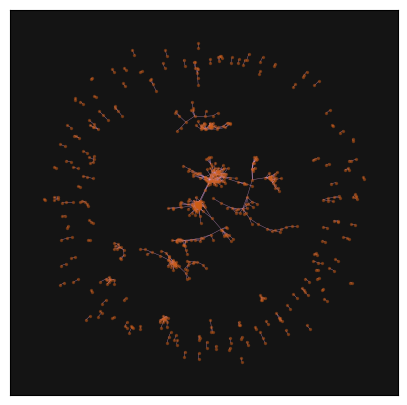

In [22]:
fig, axes = plt.subplots(1, 1, figsize = (5,5))

for i, ax in enumerate(fig.axes):
	# print(gigantes[i].number_of_edges())
	pos = nx.spring_layout(common_edges_graph, seed=42)
	edge_colors = nx.get_edge_attributes(common_edges_graph, 'color').values()
	ax.set_facecolor('#141414') 
	nx.draw_networkx_nodes(common_edges_graph,
						   pos = pos,
						   node_color = '#cc5c14',
						   ax = ax,
						   node_size = 2, alpha = 0.4)
	
	nx.draw_networkx_edges(common_edges_graph, pos = pos, ax = ax, alpha = .7, edge_color = 'plum', width = 0.3)


In [82]:
merged_graph = nx.Graph()

# Procesar las aristas de ambos grafos
for edge in gigante_pos.edges:
    if apms.has_edge(*edge):  # Pertenece a ambos
        merged_graph.add_edge(*edge, color='green')
    else:  # Solo pertenece a pos
        merged_graph.add_edge(*edge, color='blue')

for edge in apms.edges:
    if not gigante_pos.has_edge(*edge):  # Solo pertenece a apms
        merged_graph.add_edge(*edge, color='red')

# Ahora merged_graph contiene todas las aristas con los colores asignados


In [83]:
def plot_grafo(grafo):
	pos_layout = nx.spring_layout(grafo)  # Layout para la posición de los nodos
	edges = grafo.edges(data=True)

	fig, axes = plt.subplots(1, 1, figsize = (10,10))

	for i, ax in enumerate(fig.axes):
		pos = nx.spring_layout(grafo, seed=42)
		edge_colors = nx.get_edge_attributes(grafo, 'color').values()
		ax.set_facecolor('#141414') 
		nx.draw_networkx_nodes(grafo,
							pos = pos_layout,
							node_color = '#cc5c14',
							ax = ax,
							node_size = 2, alpha = 0.4)
		
		nx.draw_networkx_edges(grafo, pos = pos_layout, ax = ax, alpha = .7, edge_color = edge_colors, width = 0.3)

In [84]:
gigante_merge = gigante(merged_graph)
gigante_merge.number_of_edges(), gigante_merge.number_of_nodes()
# plot_grafo(gigante_merge)


(19258, 2437)

# Idea:
### Armar matriz de adyacencia en base a la red apms y sumar a cada elemento ij un 1 si existe correlacion positiva, y restar 0.5 si existe corr negativa

In [85]:
nodos_en_G = [node for node in apms.nodes if node in G]
cantidad_nodos_en_G = len(nodos_en_G)
cantidad_nodos_en_G

1598

In [29]:
G_positiva.number_of_nodes(), G_negativa.number_of_nodes(), G.number_of_nodes()

(6217, 6217, 6217)

In [86]:
red_pesada = nx.Graph()

for u, v in apms.edges():
    red_pesada.add_edge(u, v, weight=1)

for u, v in G_positiva.edges():
    if red_pesada.has_edge(u, v):
        red_pesada[u][v]['weight'] += 1
    else:
        # Si un enlace está en `G_positiva` pero no en `apms`, se agrega con peso 1
        red_pesada.add_edge(u, v, weight=0.3)

for u, v in G_negativa.edges():
    if red_pesada.has_edge(u, v):
        red_pesada[u][v]['weight'] -= 0.5
    else:
        # Si un enlace está solo en `G_negativa`, puedes agregarlo con peso negativo, o ignorarlo
        red_pesada.add_edge(u, v, weight=0.1)

print("Número de nodos en la red pesada:", red_pesada.number_of_nodes())
print("Número de enlaces en la red pesada:", red_pesada.number_of_edges())

# Filtrar enlaces con pesos negativos o nulos en caso de que los haya
enlaces_a_remover = [(u, v) for u, v, data in red_pesada.edges(data=True) if data['weight'] <= 0]
red_pesada.remove_edges_from(enlaces_a_remover)

print("Red final:")
print("Número de nodos:", red_pesada.number_of_nodes())

Número de nodos en la red pesada: 3287
Número de enlaces en la red pesada: 23352
Red final:
Número de nodos: 3287


In [106]:
# Obtener pesos de los enlaces
pesos = [data['weight'] for _, _, data in red_pesada.edges(data=True)]

# Definir los colores según el peso
def asignar_color(peso, colores_tuple):
	if peso == 1:
		return colores_tuple[0]
	elif peso == 2:
		return colores_tuple[1]
	elif peso == 0.5:
		return colores_tuple[2]
	else:
		return 'gray'  # Opcional, para pesos no especificados
	
def asignar_colores_full(peso, colores_tuple):
	if peso == 1:
		return colores_tuple[0]
	elif peso == 2:
		return colores_tuple[1]
	elif peso == 0.5:
		return colores_tuple[2]
	elif peso == 0.3:
		return colores_tuple[3]
	elif peso == 0.1:
		return colores_tuple[4]
	else:
		return 'gray'  # Opcional, para pesos no especificados
	
# Asignar colores basados en los pesos
colores = [asignar_color(p, colores_tuple = ('white', 'plum', 'lightseagreen')) for p in pesos]


In [108]:
def edge_colors_funcion(red_pesada, colores_tuple = ('white', 'plum', 'lightseagreen')):
    # Obtener pesos de los enlaces
	pesos = [data['weight'] for _, _, data in red_pesada.edges(data=True)]

	# Asignar colores basados en los pesos
	if len(colores_tuple) == 3:
		colores = [asignar_color(p, colores_tuple) for p in pesos]
	else:
		colores = [asignar_colores_full(p, colores_tuple) for p in pesos]

	return colores

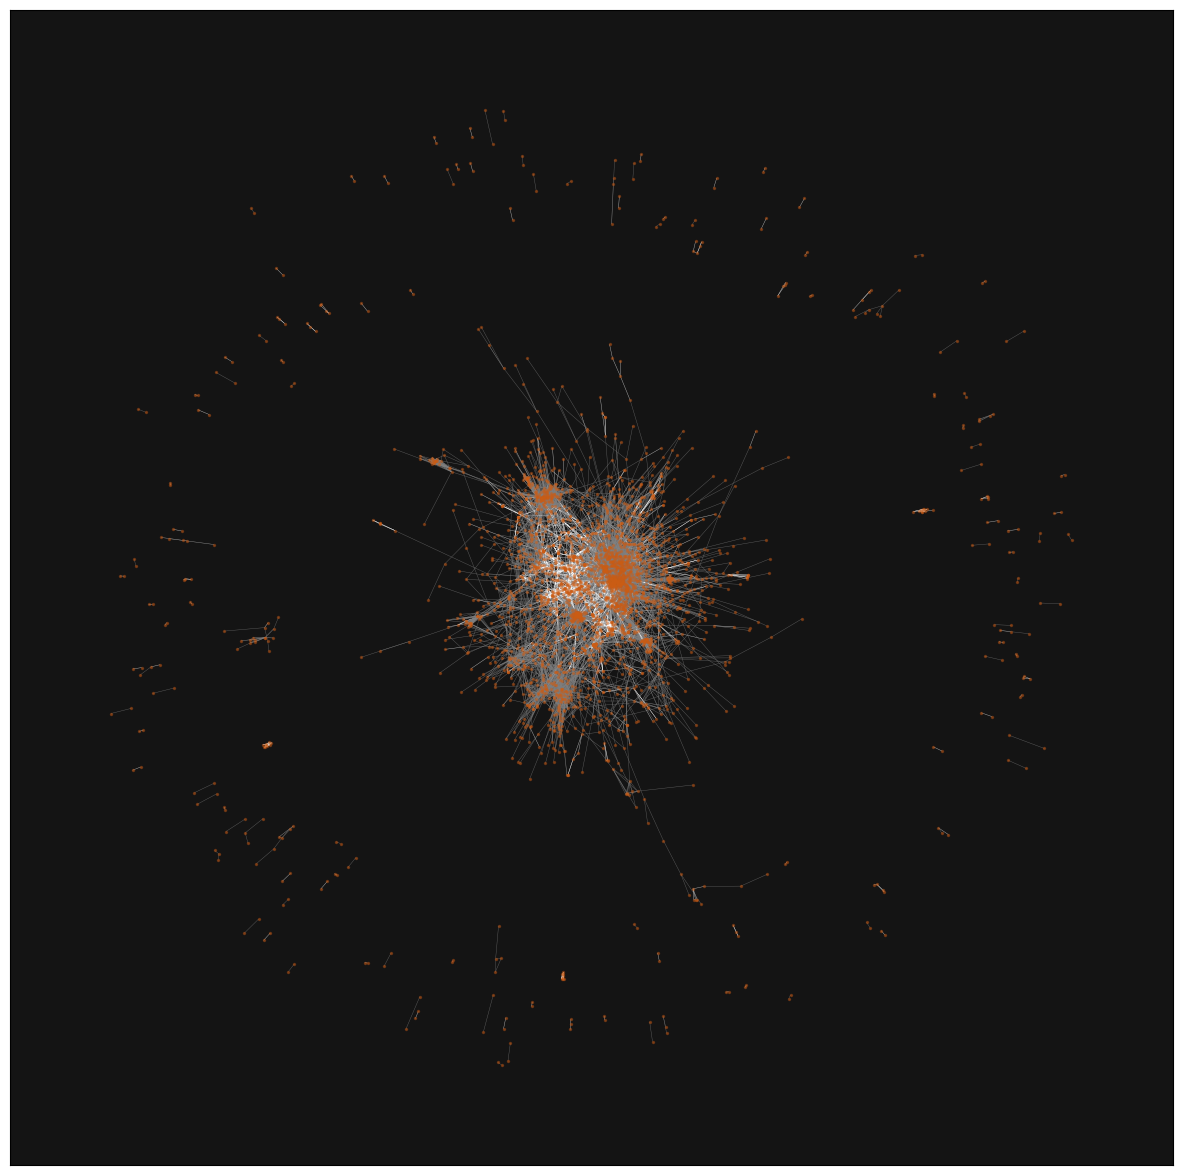

In [91]:
# Dibujar el grafo
pos_layout = nx.spring_layout(red_pesada)  # Layout para la posición de los nodos
edges = red_pesada.edges(data=True)

fig, axes = plt.subplots(1, 1, figsize = (15,15))

for i, ax in enumerate(fig.axes):
	# print(gigantes[i].number_of_edges())
	pos = nx.spring_layout(red_pesada, seed=42)
	ax.set_facecolor('#141414') 
	nx.draw_networkx_nodes(red_pesada,
						   pos = pos_layout,
						   node_color = '#cc5c14',
						   ax = ax,
						   node_size = 2, alpha = 0.4)
	
	nx.draw_networkx_edges(red_pesada, pos = pos_layout, ax = ax, alpha = .7, edge_color = colores, width = 0.3)

In [ ]:
gigante_red_pesada = gigante(red_pesada)

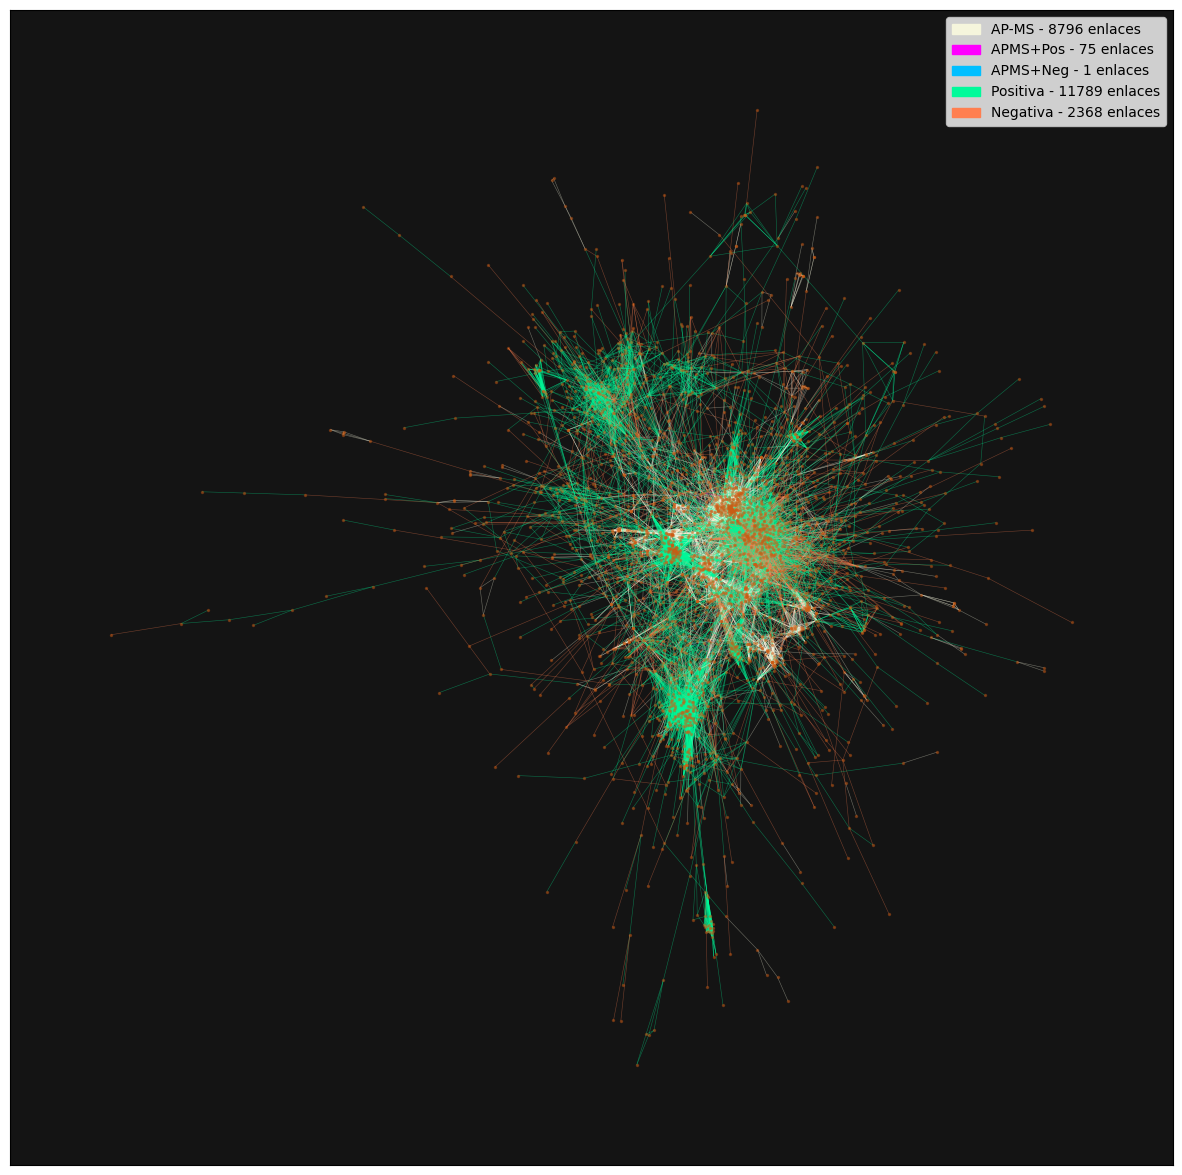

In [110]:
edges = gigante_red_pesada.edges(data=True)

colores_tuple = ('beige', 'magenta', 'deepskyblue', 'mediumspringgreen', 'coral')

colores = edge_colors_funcion(gigante_red_pesada, colores_tuple = colores_tuple)
conteo = Counter(colores)
conteo


pos_layout = nx.spring_layout(gigante_red_pesada, seed=42)  # Layout para la posición de los nodos

fig, axes = plt.subplots(1, 1, figsize = (15,15))

for i, ax in enumerate(fig.axes):
	pos = nx.spring_layout(gigante_red_pesada, seed=42)
	ax.set_facecolor('#141414') 
	nx.draw_networkx_nodes(gigante_red_pesada,
						   pos = pos_layout,
						   node_color = '#cc5c14',
						   ax = ax,
						   node_size = 2, alpha = 0.4)
	
	nx.draw_networkx_edges(gigante_red_pesada, pos = pos_layout, ax = ax, alpha = .4, edge_color = colores, width = 0.4)

if len(colores_tuple) == 5:
	plt.legend(handles=[mpatches.Patch(color=colores_tuple[0], label='AP-MS - ' + str(conteo[colores_tuple[0]]) + ' enlaces'), 
						mpatches.Patch(color=colores_tuple[1], label='APMS+Pos - ' + str(conteo[colores_tuple[1]]) + ' enlaces'), 
						mpatches.Patch(color=colores_tuple[2], label='APMS+Neg - ' + str(conteo[colores_tuple[2]]) + ' enlaces'),
						mpatches.Patch(color=colores_tuple[3], label='Positiva - ' + str(conteo[colores_tuple[3]]) + ' enlaces'),
						mpatches.Patch(color=colores_tuple[4], label='Negativa - ' + str(conteo[colores_tuple[4]]) + ' enlaces')], loc='upper right')
else:
	plt.legend(handles=[mpatches.Patch(color=colores_tuple[0], label='AP-MS - ' + str(conteo[colores_tuple[0]]) + ' enlaces'), 
						mpatches.Patch(color=colores_tuple[1], label='APMS+Pos - ' + str(conteo[colores_tuple[1]]) + ' enlaces'), 
						mpatches.Patch(color=colores_tuple[2], label='APMS+Neg - ' + str(conteo[colores_tuple[2]]) + ' enlaces')], loc='upper right')


In [96]:
conteo = Counter(colores)
conteo

Counter({'white': 8796, 'gray': 14157, 'plum': 75, 'lightseagreen': 1})

In [111]:
nx.write_gpickle(red_pesada, 'red_pesada-cota09+full.gpickle')

In [112]:
red_pesada.number_of_edges(), red_pesada.number_of_nodes()

(23352, 3287)

## Voy a intentar aplicar los algoritmos de similaridad para armar clusters

#### Con matriz de adyacencia 0.9 + full

In [114]:
import igraph as ig
from community import community_louvain as com
import random

In [196]:
# red_pesada.edges(data=True)

In [168]:
# Devuelta armo subset de nodos que estan en la red pesada para testeo

prueba = red_pesada.copy()

# Seleccionar 500 enlaces aleatorios del grafo principal
enlaces = list(red_pesada.edges(data=True))
enlaces_prueba = random.sample(enlaces, 1500)

# Crear la subred con esos enlaces
prueba = nx.Graph()
prueba.add_edges_from(enlaces_prueba)


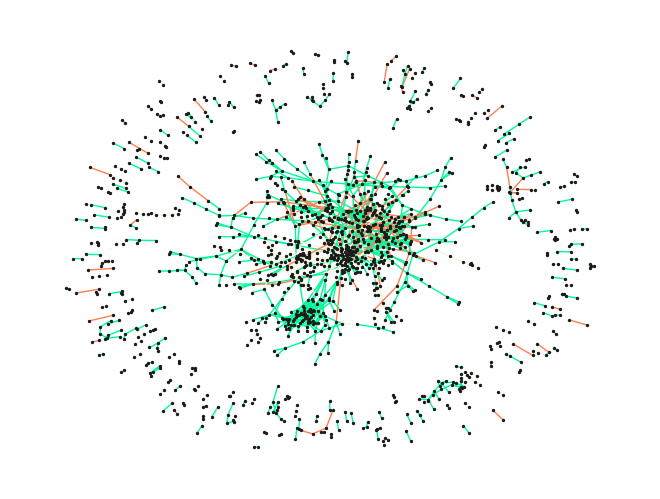

In [170]:
colores_tuple = ('beige', 'magenta', 'deepskyblue', 'mediumspringgreen', 'coral')

colores = edge_colors_funcion(prueba, colores_tuple = colores_tuple)
nx.draw_spring(prueba, node_size=2, edge_color=colores, node_color = 'k', with_labels=False)

In [184]:
# Louivan
com_lv = com.best_partition(red_pesada, weight='weight')

In [185]:
print('Louvain')
print(f'La cantidad de comunas que maximiza la modularidad es: {max(com_lv.values()) + 1}')
print(f'La modularidad de dicha partición es: {com.modularity(com_lv, prueba)}')
# Agrupamos los nodos por comunidad
comunidades = {}
for nodo, comunidad in com_lv.items():
	if comunidad not in comunidades:
		comunidades[comunidad] = []
	comunidades[comunidad].append(nodo)

# Imprimimos las comunidades en el formato solicitado
for comunidad, nodos in comunidades.items():
	print(f'[{comunidad}] {", ".join(nodos)}')

Louvain
La cantidad de comunas que maximiza la modularidad es: 176
La modularidad de dicha partición es: 0.8117904037301396
[55] YAL001C, YBR123C, YDR362C, YGR047C, YOR110W, YPL007C, YNL209W, YDL018C, YIL035C, YAL024C, YHR158C, YGR238C, YPR174C, YNL233W, YLR212C, YJL173C, YAR007C, YHR164C, YML032C, YNL312W, YOL090W, YBR136W, YCR028CA, YDL156W, YER104W, YCR092C, YDR097C, YML069W, YJL115W, YCL024W, YDR507C, YBR279W, YGL019W, YGL207W, YGL244W, YOL145C, YOR039W, YOR061W, YOR123C, YBL035C, YIR008C, YKL045W, YNL102W, YPL208W, YPL153C, YBR087W, YJR068W, YNL290W, YOL094C, YOR144C, YMR078C, YMR199W, YPL256C, YBR195C, YML102W, YPR018W, YDR121W, YBR278W, YNL262W, YPR175W, YLR418C, YER164W, YMR172W, YKL088W, YHR131C, YLR407W, YCL016C, YHR191C, YDL003W, YFL008W, YJL074C, YHR110W, YDL056W, YLR182W, YER111C, YDL102W, YJR006W, YJR043C, YDR013W, YJL072C, YOL146W, YDR489W, YDR016C, YDR201W, YGL061C, YKL052C, YGR113W, YKR083C, YDR279W, YNL072W, YER125W, YJL084C, YKR021W, YOR124C, YOR138C, YER149C, YLL021

In [186]:
red_pesada.number_of_nodes()

3287

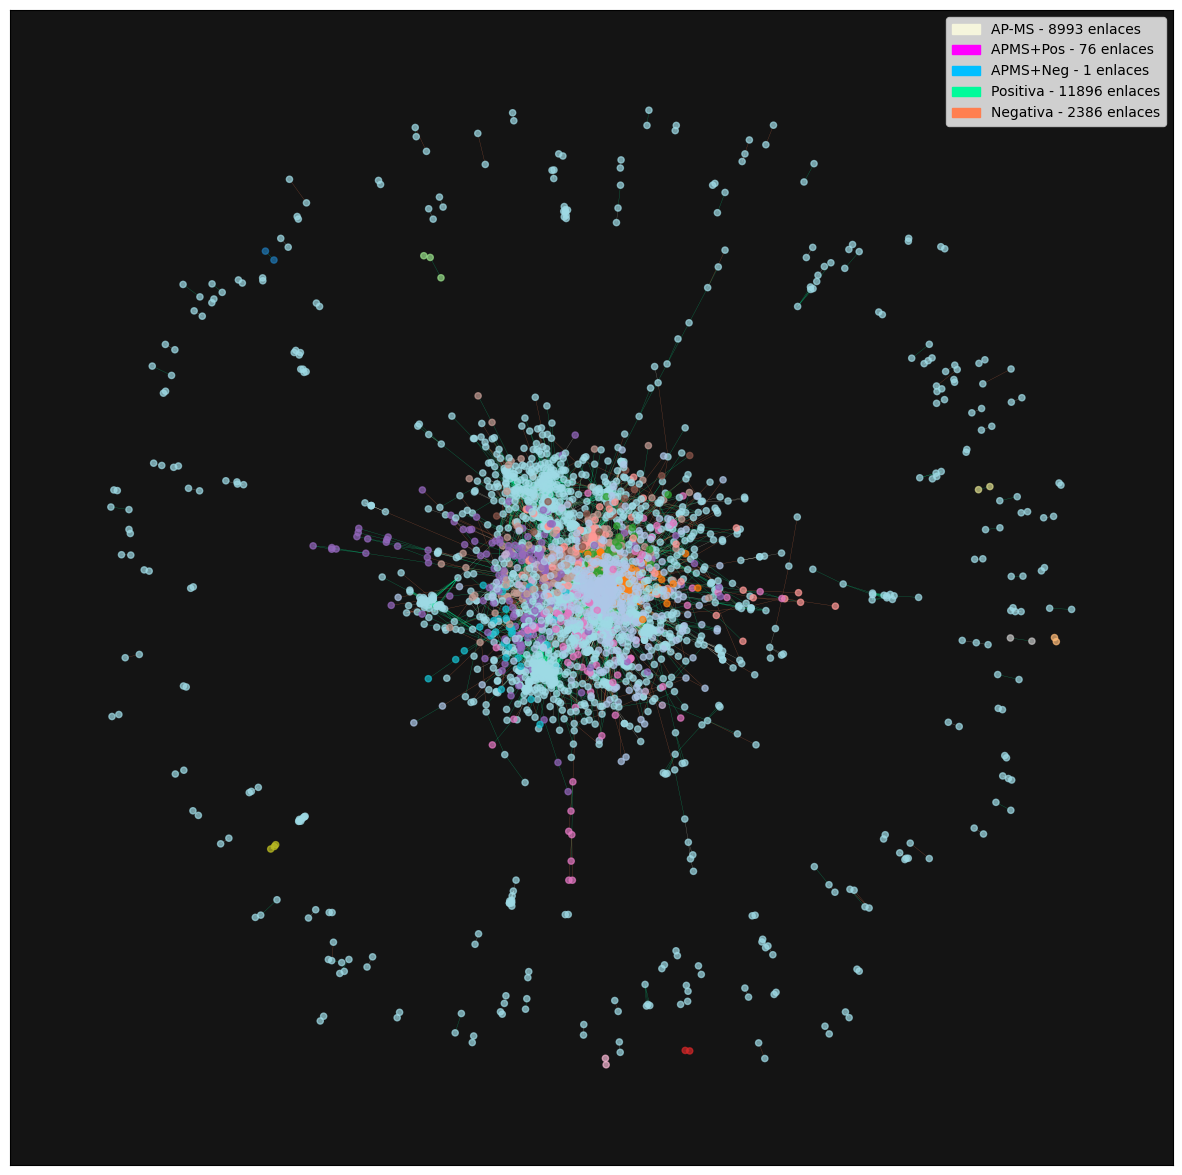

In [187]:
# Red clusterizada

# Creo un diccionario con los nombres de los nodos como keys y los clusters como values
pos = nx.layout.spring_layout(red_pesada, seed=42)
colores = edge_colors_funcion(red_pesada, colores_tuple = colores_tuple)
conteo = Counter(colores)

fig, axs = plt.subplots(1, 1, figsize = (15, 15))

for i, ax in enumerate(fig.axes):
	ax.set_facecolor('#141414')  # Cambiar color de background
	nx.draw_networkx_nodes(red_pesada,
						   pos = pos,
						   node_color = [plt.get_cmap('tab20')(com_lv[v]) for v in red_pesada.nodes()],
						   ax = ax,
						   node_size = 20, alpha = 0.7)
	nx.draw_networkx_edges(red_pesada, pos = pos, ax = ax, alpha = .5, edge_color = colores, width = 0.2)
	ax.axis('on')

	ax.legend('Louivan', loc='upper right', frameon=False, fontsize=12, labelcolor='white', markerscale=0.01)

if len(colores_tuple) == 5:
	plt.legend(handles=[mpatches.Patch(color=colores_tuple[0], label='AP-MS - ' + str(conteo[colores_tuple[0]]) + ' enlaces'), 
						mpatches.Patch(color=colores_tuple[1], label='APMS+Pos - ' + str(conteo[colores_tuple[1]]) + ' enlaces'), 
						mpatches.Patch(color=colores_tuple[2], label='APMS+Neg - ' + str(conteo[colores_tuple[2]]) + ' enlaces'),
						mpatches.Patch(color=colores_tuple[3], label='Positiva - ' + str(conteo[colores_tuple[3]]) + ' enlaces'),
						mpatches.Patch(color=colores_tuple[4], label='Negativa - ' + str(conteo[colores_tuple[4]]) + ' enlaces')], loc='upper right')
else:
	plt.legend(handles=[mpatches.Patch(color=colores_tuple[0], label='AP-MS - ' + str(conteo[colores_tuple[0]]) + ' enlaces'), 
						mpatches.Patch(color=colores_tuple[1], label='APMS+Pos - ' + str(conteo[colores_tuple[1]]) + ' enlaces'), 
						mpatches.Patch(color=colores_tuple[2], label='APMS+Neg - ' + str(conteo[colores_tuple[2]]) + ' enlaces')], loc='upper right')
	
	plt.tight_layout()

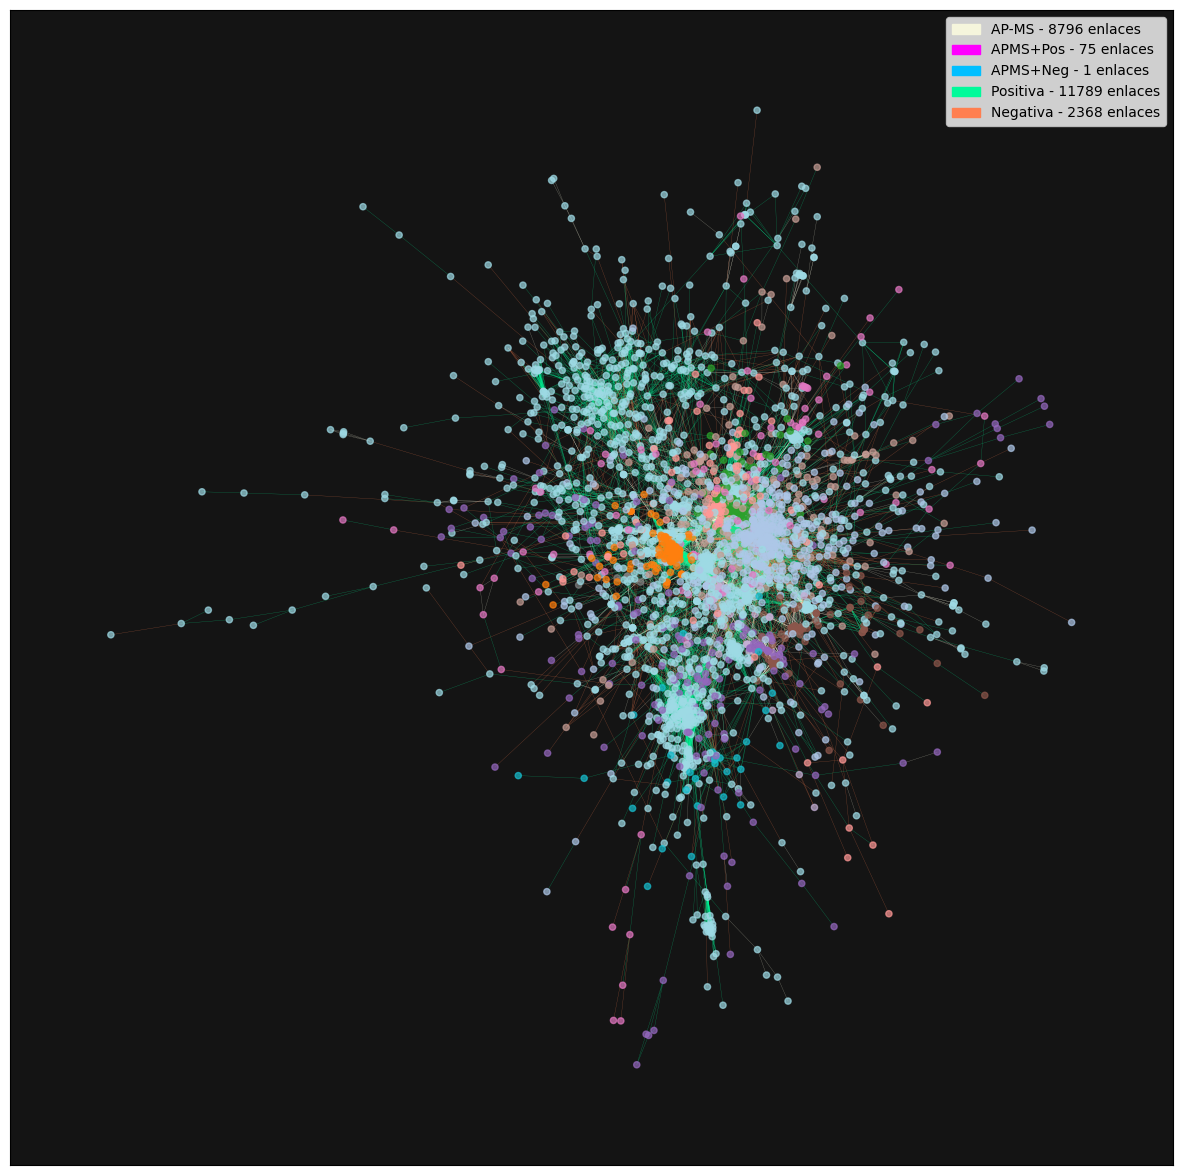

In [189]:
gigante_prueba = gigante(red_pesada)

pos = nx.layout.spring_layout(gigante_prueba, seed=42)
colores = edge_colors_funcion(gigante_prueba, colores_tuple = colores_tuple)
conteo = Counter(colores)

fig, axs = plt.subplots(1, 1, figsize = (15, 15))

for i, ax in enumerate(fig.axes):
	ax.set_facecolor('#141414')  # Cambiar color de background
	nx.draw_networkx_nodes(gigante_prueba,
						   pos = pos,
						   node_color = [plt.get_cmap('tab20')(com_lv[v]) for v in gigante_prueba.nodes()],
						   ax = ax,
						   node_size = 20, alpha = 0.7)
	nx.draw_networkx_edges(gigante_prueba, pos = pos, ax = ax, alpha = .5, edge_color = colores, width = 0.2)
	ax.axis('on')

	ax.legend('Louivan', loc='upper right', frameon=False, fontsize=12, labelcolor='white', markerscale=0.01)

if len(colores_tuple) == 5:
	plt.legend(handles=[mpatches.Patch(color=colores_tuple[0], label='AP-MS - ' + str(conteo[colores_tuple[0]]) + ' enlaces'), 
						mpatches.Patch(color=colores_tuple[1], label='APMS+Pos - ' + str(conteo[colores_tuple[1]]) + ' enlaces'), 
						mpatches.Patch(color=colores_tuple[2], label='APMS+Neg - ' + str(conteo[colores_tuple[2]]) + ' enlaces'),
						mpatches.Patch(color=colores_tuple[3], label='Positiva - ' + str(conteo[colores_tuple[3]]) + ' enlaces'),
						mpatches.Patch(color=colores_tuple[4], label='Negativa - ' + str(conteo[colores_tuple[4]]) + ' enlaces')], loc='upper right')
else:
	plt.legend(handles=[mpatches.Patch(color=colores_tuple[0], label='AP-MS - ' + str(conteo[colores_tuple[0]]) + ' enlaces'), 
						mpatches.Patch(color=colores_tuple[1], label='APMS+Pos - ' + str(conteo[colores_tuple[1]]) + ' enlaces'), 
						mpatches.Patch(color=colores_tuple[2], label='APMS+Neg - ' + str(conteo[colores_tuple[2]]) + ' enlaces')], loc='upper right')
	
	plt.tight_layout()

#### Con matriz de adyacencia 0.6

In [190]:
red_pesada = nx.read_gpickle('red_pesada-cota06.gpickle')
print(red_pesada.edges(data=True))

[('YAL001C', 'YBR123C', {'weight': 1}), ('YAL001C', 'YDR362C', {'weight': 1}), ('YAL001C', 'YGR047C', {'weight': 1}), ('YAL001C', 'YOR110W', {'weight': 1}), ('YAL001C', 'YPL007C', {'weight': 1}), ('YBR123C', 'YDR362C', {'weight': 1}), ('YBR123C', 'YGR047C', {'weight': 1}), ('YBR123C', 'YOR110W', {'weight': 1}), ('YBR123C', 'YPL007C', {'weight': 1}), ('YDR362C', 'YGR047C', {'weight': 1}), ('YDR362C', 'YOR110W', {'weight': 1}), ('YDR362C', 'YPL007C', {'weight': 1}), ('YGR047C', 'YOR110W', {'weight': 1}), ('YGR047C', 'YPL007C', {'weight': 1}), ('YOR110W', 'YPL007C', {'weight': 1}), ('YAL002W', 'YLR148W', {'weight': 1}), ('YAL002W', 'YLR396C', {'weight': 1}), ('YAL002W', 'YMR231W', {'weight': 2}), ('YAL002W', 'YPL045W', {'weight': 1}), ('YLR148W', 'YDL077C', {'weight': 1}), ('YLR148W', 'YDR080W', {'weight': 2}), ('YLR148W', 'YLR396C', {'weight': 1}), ('YLR148W', 'YMR231W', {'weight': 1}), ('YLR148W', 'YPL045W', {'weight': 1}), ('YLR396C', 'YDL077C', {'weight': 1}), ('YLR396C', 'YDR080W', {

In [193]:
# Louivan
com_lv = com.best_partition(red_pesada, weight='weight')

print('Louvain')
print(f'La cantidad de comunas que maximiza la modularidad es: {max(com_lv.values()) + 1}')
print(f'La modularidad de dicha partición es: {com.modularity(com_lv, prueba)}')
# Agrupamos los nodos por comunidad
comunidades = {}
for nodo, comunidad in com_lv.items():
	if comunidad not in comunidades:
		comunidades[comunidad] = []
	comunidades[comunidad].append(nodo)

# Imprimimos las comunidades en el formato solicitado
for comunidad, nodos in comunidades.items():
	print(f'[{comunidad}] {", ".join(nodos)}')

Louvain
La cantidad de comunas que maximiza la modularidad es: 214
La modularidad de dicha partición es: 0.8004138112050723
[0] YAL001C, YBR123C, YDR362C, YGR047C, YOR110W, YPL007C
[1] YAL002W, YLR148W, YLR396C, YMR231W, YPL045W, YDL077C, YDR080W
[2] YAL003W, YEL034W, YGR285C, YHR064C, YKL081W, YLR249W, YPL048W, YNL209W, YBR025C, YBR118W, YPR080W, YBR196C, YDR385W, YLL026W, YLR044C, YMR186W, YOL086C, YOR133W, YOR136W, YAL026C, YLR447C, YGR020C, YKL119C, YOR270C, YBR017C, YEL022W, YGL195W, YLR342W, YLR180W, YBL071WA, YIL103W, YKL191W, YBL099W, YJR121W, YDL185W, YGL122C, YJR077C, YOR160W, YGR218W, YHR020W, YMR012W, YKL182W, YBR127C, YEL051W, YFR009W, YHR039CA, YJR033C, YKL080W, YOR332W, YPR036W, YDL143W, YDR214W, YFL045C, YIL094C, YKL029C, YKL104C, YBR072W, YNL064C, YDR202C, YDR171W, YGL245W, YCR012W, YHR174W, YKL060C, YDR127W, YOR027W, YPL240C, YDR050C, YMR083W, YMR303C, YGR192C, YKL152C, YDL112W, YPL231W, YDR328C, YKR014C, YMR258C, YDR188W, YIL142W, YOR281C, YJL111W, YNL212W, YER086W, 

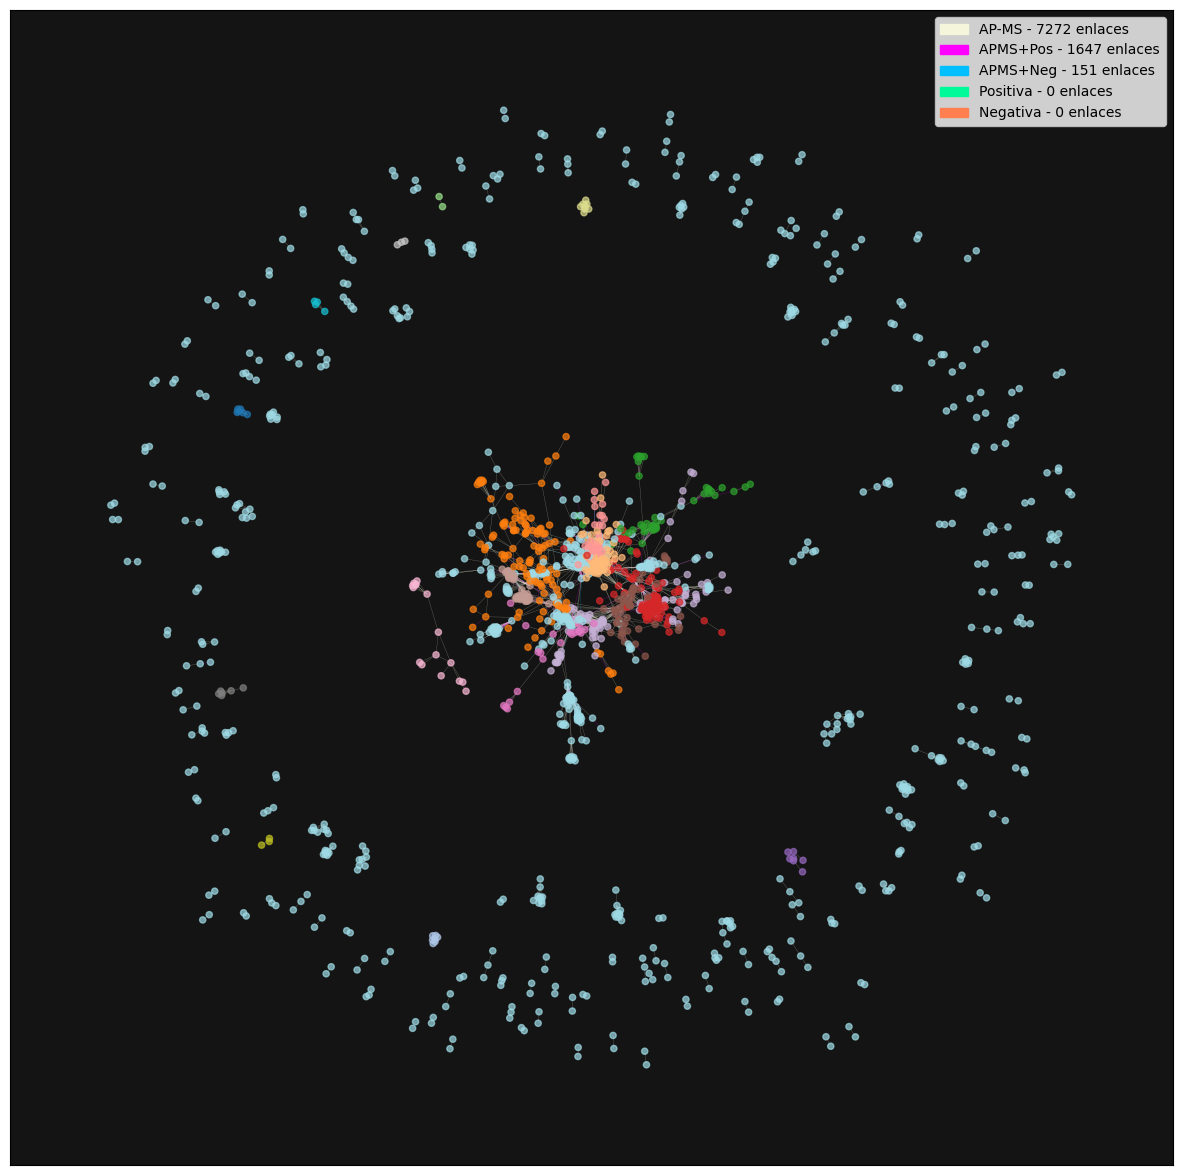

In [194]:
# Red clusterizada

# Creo un diccionario con los nombres de los nodos como keys y los clusters como values
pos = nx.layout.spring_layout(red_pesada, seed=42)
colores = edge_colors_funcion(red_pesada, colores_tuple = colores_tuple)
conteo = Counter(colores)

fig, axs = plt.subplots(1, 1, figsize = (15, 15))

for i, ax in enumerate(fig.axes):
	ax.set_facecolor('#141414')  # Cambiar color de background
	nx.draw_networkx_nodes(red_pesada,
						   pos = pos,
						   node_color = [plt.get_cmap('tab20')(com_lv[v]) for v in red_pesada.nodes()],
						   ax = ax,
						   node_size = 20, alpha = 0.7)
	nx.draw_networkx_edges(red_pesada, pos = pos, ax = ax, alpha = .5, edge_color = colores, width = 0.2)
	ax.axis('on')

	ax.legend('Louivan', loc='upper right', frameon=False, fontsize=12, labelcolor='white', markerscale=0.01)

if len(colores_tuple) == 5:
	plt.legend(handles=[mpatches.Patch(color=colores_tuple[0], label='AP-MS - ' + str(conteo[colores_tuple[0]]) + ' enlaces'), 
						mpatches.Patch(color=colores_tuple[1], label='APMS+Pos - ' + str(conteo[colores_tuple[1]]) + ' enlaces'), 
						mpatches.Patch(color=colores_tuple[2], label='APMS+Neg - ' + str(conteo[colores_tuple[2]]) + ' enlaces'),
						mpatches.Patch(color=colores_tuple[3], label='Positiva - ' + str(conteo[colores_tuple[3]]) + ' enlaces'),
						mpatches.Patch(color=colores_tuple[4], label='Negativa - ' + str(conteo[colores_tuple[4]]) + ' enlaces')], loc='upper right')
else:
	plt.legend(handles=[mpatches.Patch(color=colores_tuple[0], label='AP-MS - ' + str(conteo[colores_tuple[0]]) + ' enlaces'), 
						mpatches.Patch(color=colores_tuple[1], label='APMS+Pos - ' + str(conteo[colores_tuple[1]]) + ' enlaces'), 
						mpatches.Patch(color=colores_tuple[2], label='APMS+Neg - ' + str(conteo[colores_tuple[2]]) + ' enlaces')], loc='upper right')
	
	plt.tight_layout()

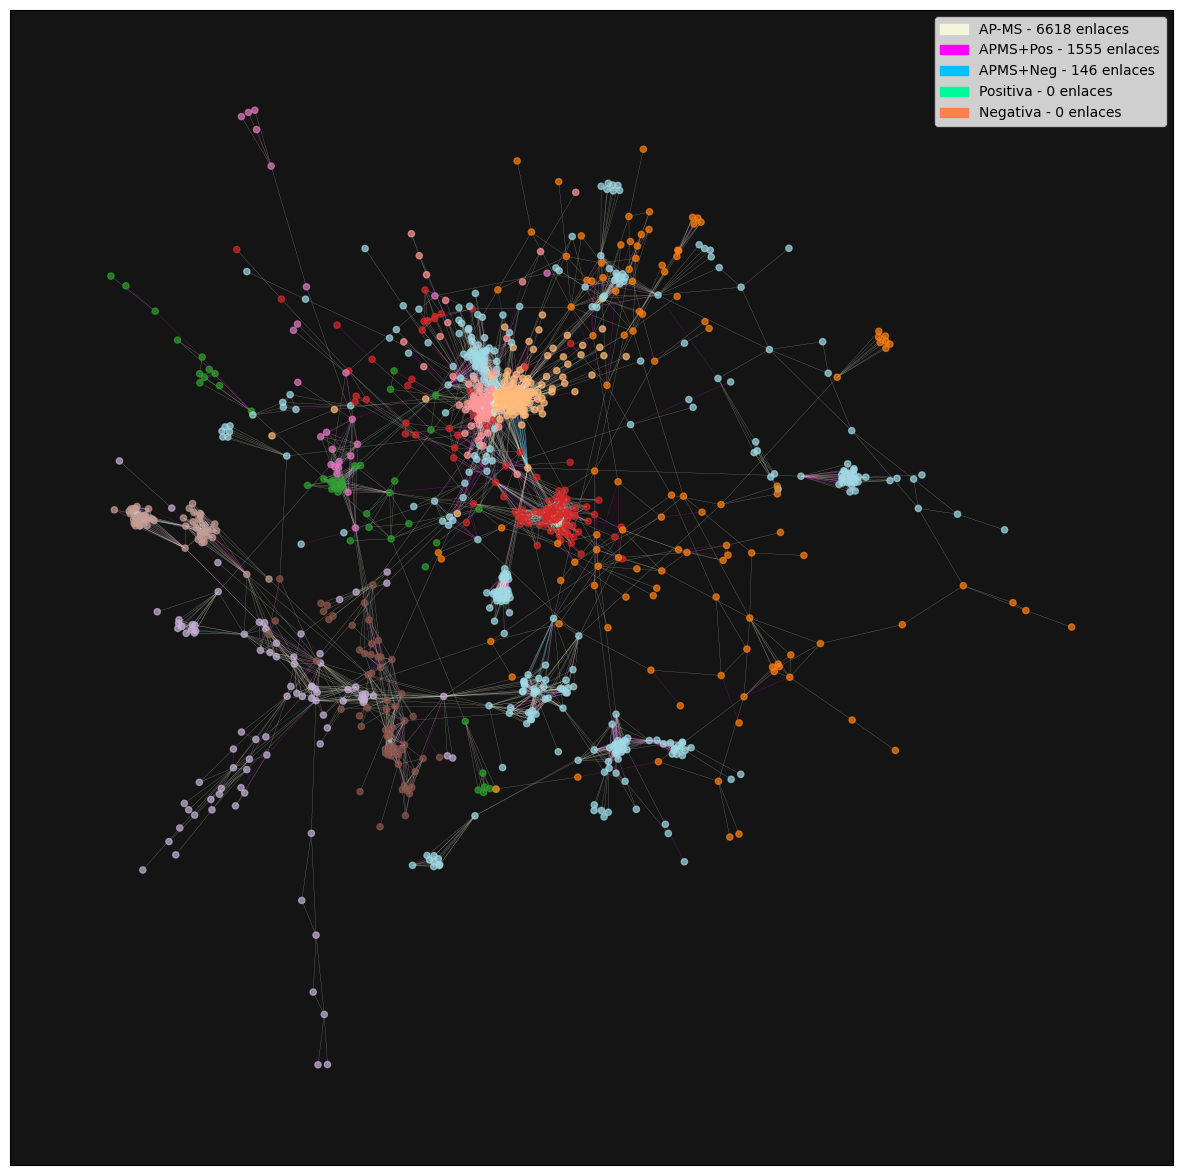

In [195]:
gigante_prueba = gigante(red_pesada)

pos = nx.layout.spring_layout(gigante_prueba, seed=42)
colores = edge_colors_funcion(gigante_prueba, colores_tuple = colores_tuple)
conteo = Counter(colores)

fig, axs = plt.subplots(1, 1, figsize = (15, 15))

for i, ax in enumerate(fig.axes):
	ax.set_facecolor('#141414')  # Cambiar color de background
	nx.draw_networkx_nodes(gigante_prueba,
						   pos = pos,
						   node_color = [plt.get_cmap('tab20')(com_lv[v]) for v in gigante_prueba.nodes()],
						   ax = ax,
						   node_size = 20, alpha = 0.7)
	nx.draw_networkx_edges(gigante_prueba, pos = pos, ax = ax, alpha = .5, edge_color = colores, width = 0.2)
	ax.axis('on')

	ax.legend('Louivan', loc='upper right', frameon=False, fontsize=12, labelcolor='white', markerscale=0.01)

if len(colores_tuple) == 5:
	plt.legend(handles=[mpatches.Patch(color=colores_tuple[0], label='AP-MS - ' + str(conteo[colores_tuple[0]]) + ' enlaces'), 
						mpatches.Patch(color=colores_tuple[1], label='APMS+Pos - ' + str(conteo[colores_tuple[1]]) + ' enlaces'), 
						mpatches.Patch(color=colores_tuple[2], label='APMS+Neg - ' + str(conteo[colores_tuple[2]]) + ' enlaces'),
						mpatches.Patch(color=colores_tuple[3], label='Positiva - ' + str(conteo[colores_tuple[3]]) + ' enlaces'),
						mpatches.Patch(color=colores_tuple[4], label='Negativa - ' + str(conteo[colores_tuple[4]]) + ' enlaces')], loc='upper right')
else:
	plt.legend(handles=[mpatches.Patch(color=colores_tuple[0], label='AP-MS - ' + str(conteo[colores_tuple[0]]) + ' enlaces'), 
						mpatches.Patch(color=colores_tuple[1], label='APMS+Pos - ' + str(conteo[colores_tuple[1]]) + ' enlaces'), 
						mpatches.Patch(color=colores_tuple[2], label='APMS+Neg - ' + str(conteo[colores_tuple[2]]) + ' enlaces')], loc='upper right')
	
	plt.tight_layout()